<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Huge{\text{Solution for Q1 (Linear Regression using OLRS}}$

 
$\large{\text{Step 1: Import The Required Libraries. }} $

Let us first consider a sample data, which will be useful for our study of linear regression in high dimensions. 

In [3]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now lets load the Q1_train dataset using Pandas


In [4]:
#Let us explore the data and the description 
weight_height_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q1/Q1_train.xlsx?raw=true', index_col=False, header=0)
#print the first few rows of the data 
weight_height_data.head()


,Species,Length_cm,Height_pct,Width_pct,Weight_g
0,1,30.0,38.4,13.4,242.0
1,1,31.2,40.0,13.8,290.0
2,1,31.1,39.8,15.1,340.0
3,1,33.5,38.0,13.3,363.0
4,1,34.0,36.6,15.1,430.0


In [5]:
print('Shape of dataset= ', weight_height_data.shape) # To get no of rows and columns

#Lets print some of the important info about the data set and its attributes
weight_height_data.info()

Shape of dataset=  (124, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Species     124 non-null    int64  
 1   Length_cm   124 non-null    float64
 2   Height_pct  124 non-null    float64
 3   Width_pct   124 non-null    float64
 4   Weight_g    124 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.0 KB


In [8]:
#Lets check if any of the attribute has null value. If null value are there then we need to do some preprocessing of the data.
# isna() will return 'True' is value is 'None' or 'numpy.NaN'
weight_height_data.isna().sum()

Species       0
Length_cm     0
Height_pct    0
Width_pct     0
Weight_g      0
dtype: int64

We dont see any attributes has null value from above result.

In [ ]:
#Lets see some correlation betwen the attributes
weight_height_data.corr()

,Species,Length_cm,Height_pct,Width_pct,Weight_g
Species,1.000000,-0.139894,-0.667973,0.078128,-0.147799
Length_cm,-0.139894,1.000000,0.135548,0.030504,0.921418
Height_pct,-0.667973,0.135548,1.000000,0.454868,0.214705
Width_pct,0.078128,0.030504,0.454868,1.000000,0.141040
Weight_g,-0.147799,0.921418,0.214705,0.141040,1.000000


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data. 

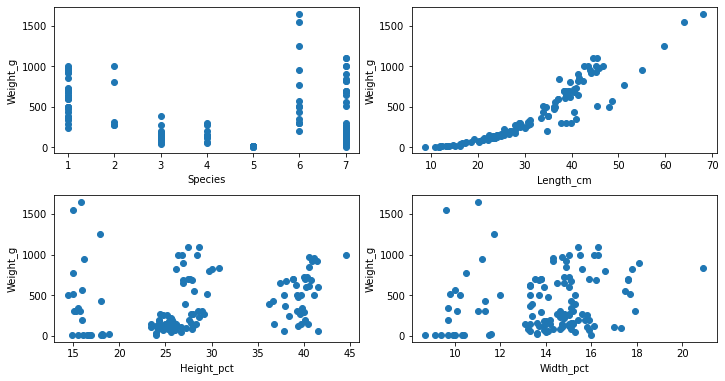

In [10]:
#We will plot multiple scatter plots of weight_g vs other attributes
fig = plt.figure(figsize=(10, 10)) 

fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)


ax11.scatter(weight_height_data['Species'],weight_height_data['Weight_g'])
ax11.set_xlabel('Species')
ax11.set_ylabel('Weight_g')


ax12.scatter(weight_height_data['Length_cm'],weight_height_data['Weight_g'])
ax12.set_xlabel('Length_cm')
ax12.set_ylabel('Weight_g')

ax21.scatter(weight_height_data['Height_pct'],weight_height_data['Weight_g'])
ax21.set_xlabel('Height_pct')
ax21.set_ylabel('Weight_g')

ax22.scatter(weight_height_data['Width_pct'],weight_height_data['Weight_g'])
ax22.set_xlabel('Width_pct')
ax22.set_ylabel('Weight_g')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We see some mixed trend in most of the plots.

$\large{\text{Linear relationship between }} \mathbf{x} \text{ and } y \text{ captured by a plane}$.

$\Large{\text{Probabilistic interpretation}}$ 

In probability terms, let us assume that $Y \in {\mathbb{R}}$ denotes the response random variable and $X \in {\mathbb{R}}^d$ denotes the predictor random variable in $d$ dimensions. 

Then we assume that the expected value of $Y$ given some observation of $X=(x_1,x_2,\ldots,x_d)$ is represented as: 

$
E[Y|X=(x_1,x_2,\ldots,x_d)] =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d.
$.

This can be equivalenty represented as:

$
E[Y|X=(x_1,x_2,\ldots,x_d)] =  \beta_0  + \sum_{j=1}^{d} \beta_j x_j.
$.

However when we observe a data point $({\mathbf{x}}^i, y^i)$ as a realization of the pair $(X,Y)$, where $\mathbf{x}^i=(x^i_1,x^i_2,\ldots,x^i_d)$, it is possible that the observed value $y^i$ of the response random variable $Y$ is not necessarily equal to the expected value $E[Y|X=\mathbf{x}^i]= \beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$. 

In such case, we assume that the discrepancy between the observed value $y^i$ and the expected value $E[Y|X=\mathbf{x}^i]$ is captured by an error $e^i$ given by:

$
\begin{align}
e^i &= y^i - E[Y|X=\mathbf{x}^i] \\
\implies e^i&= y^i - (\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j). 
\end{align}
$ 



Now we can assume that the data set $D$ comprises multiple realizations of the random variable pair $(X,Y)$. 

Thus when we the data set $D$ contains $n$ observations of the form $\{(\mathbf{x}^1,y^1), (\mathbf{x}^2,y^2), \ldots, (\mathbf{x}^n,y^n)\}$, then we can compute the errors as:
$\begin{align}
e^i = y^i - (\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j), \forall i \in \{1,2,\ldots,n\}.
\end{align}
$

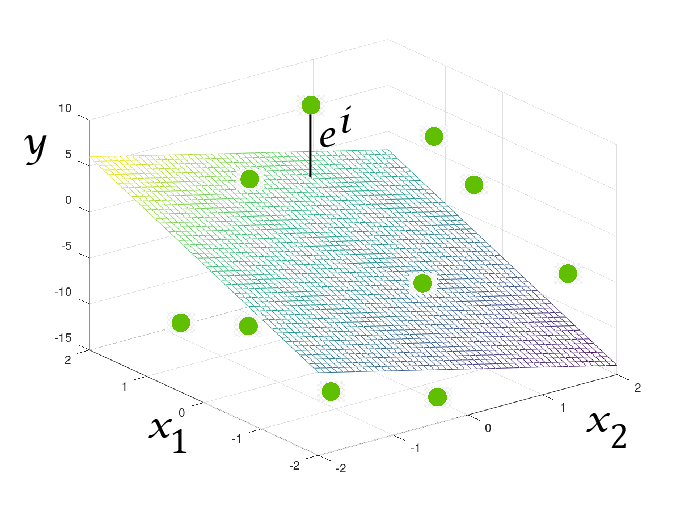

In [ ]:
img_points_errors = Image.open(urlopen('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/images/plane_pic_with_points_errors.png'))
img_points_errors

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1 
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix. 

Similarly assume that 
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve 

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver. 



## $
\Large{\text{(a) [C] Find optimal } \beta \text{ by setting λ = 0. Let the optimal β be called } \beta_0^* }
$


$
\text {   i. [C, R] Report the value of } \beta_0^* \text {and the RMSE and } R^2 \text { values for train data set.}
$

In [12]:
#Let us now compute beta_train 
n_train = len(weight_height_data.index) #number of data points in the data set
print('number of data points in the data set:',n_train)

number of data points in the data set: 124


In [ ]:
#extract the predictor variable columns 
cols = [0,1,2,3]
X_data = weight_height_data[weight_height_data.columns[cols]]

X_data

,Species,Length_cm,Height_pct,Width_pct
0,1,30.0,38.4,13.4
1,1,31.2,40.0,13.8
2,1,31.1,39.8,15.1
3,1,33.5,38.0,13.3
4,1,34.0,36.6,15.1
...,...,...,...,...
119,7,42.5,26.2,15.6
120,7,44.6,28.7,15.4
121,7,45.2,26.4,16.1
122,7,45.5,27.5,16.3


In [ ]:
#convert predictor variable columns into a numpy array

X_array = weight_height_data[weight_height_data.columns[cols]].to_numpy()
X_array

array([[ 1. , 30. , 38.4, 13.4],
       [ 1. , 31.2, 40. , 13.8],
       [ 1. , 31.1, 39.8, 15.1],
       [ 1. , 33.5, 38. , 13.3],
       [ 1. , 34. , 36.6, 15.1],
       [ 1. , 34.5, 41.1, 15.3],
       [ 1. , 35. , 36.2, 13.4],
       [ 1. , 36.2, 39.3, 13.7],
       [ 1. , 36.2, 39.4, 14.1],
       [ 1. , 36.2, 39.7, 13.3],
       [ 1. , 36.4, 37.8, 12. ],
       [ 1. , 37.2, 40.2, 13.9],
       [ 1. , 37.2, 41.5, 15. ],
       [ 1. , 38.3, 38.8, 13.8],
       [ 1. , 38.5, 38.8, 13.5],
       [ 1. , 38.6, 40.5, 13.3],
       [ 1. , 38.7, 37.4, 14.8],
       [ 1. , 39.2, 40.8, 13.7],
       [ 1. , 39.7, 39.1, 13.3],
       [ 1. , 40.6, 38.1, 15.1],
       [ 1. , 40.5, 40.1, 13.8],
       [ 1. , 40.9, 40. , 14.8],
       [ 1. , 40.6, 40.3, 15. ],
       [ 1. , 41.6, 40.6, 14.9],
       [ 1. , 42.6, 44.5, 15.5],
       [ 1. , 44.1, 40.9, 14.3],
       [ 1. , 44. , 41.1, 14.3],
       [ 1. , 45.3, 41.4, 14.9],
       [ 1. , 45.9, 40.6, 14.7],
       [ 2. , 28.7, 29.2, 14.8],
       [ 2

In [ ]:
import numpy as np
#add a column of ones to X_array
X_train = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))

X_train

array([[ 1. , 30. , 38.4, 13.4,  1. ],
       [ 1. , 31.2, 40. , 13.8,  1. ],
       [ 1. , 31.1, 39.8, 15.1,  1. ],
       [ 1. , 33.5, 38. , 13.3,  1. ],
       [ 1. , 34. , 36.6, 15.1,  1. ],
       [ 1. , 34.5, 41.1, 15.3,  1. ],
       [ 1. , 35. , 36.2, 13.4,  1. ],
       [ 1. , 36.2, 39.3, 13.7,  1. ],
       [ 1. , 36.2, 39.4, 14.1,  1. ],
       [ 1. , 36.2, 39.7, 13.3,  1. ],
       [ 1. , 36.4, 37.8, 12. ,  1. ],
       [ 1. , 37.2, 40.2, 13.9,  1. ],
       [ 1. , 37.2, 41.5, 15. ,  1. ],
       [ 1. , 38.3, 38.8, 13.8,  1. ],
       [ 1. , 38.5, 38.8, 13.5,  1. ],
       [ 1. , 38.6, 40.5, 13.3,  1. ],
       [ 1. , 38.7, 37.4, 14.8,  1. ],
       [ 1. , 39.2, 40.8, 13.7,  1. ],
       [ 1. , 39.7, 39.1, 13.3,  1. ],
       [ 1. , 40.6, 38.1, 15.1,  1. ],
       [ 1. , 40.5, 40.1, 13.8,  1. ],
       [ 1. , 40.9, 40. , 14.8,  1. ],
       [ 1. , 40.6, 40.3, 15. ,  1. ],
       [ 1. , 41.6, 40.6, 14.9,  1. ],
       [ 1. , 42.6, 44.5, 15.5,  1. ],
       [ 1. , 44.1, 40.9,

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [4]
y_train = weight_height_data[weight_height_data.columns[response_cols]].to_numpy()
y_train


array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 500. ],
       [ 390. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 800. ],
       [1000. ],
       [  40. ],
       [  69. ],
       [  87. ],
       [ 120. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 272. ],
       [ 390. ],
       [  55. ],
       [  60. ],
       [ 120. ],
       [ 150. ],
       [ 140. ],
       [ 145. ],
       [ 200. ],
       [ 273. ],
       [ 300. ],
       [   6.7

In [ ]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),y_train)
#print('Xy shape:',Xy.shape)

beta_train = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta_train)

XTX shape: (5, 5)
beta [[   2.4173551 ]
 [  27.8581628 ]
 [   2.67475542]
 [  13.06363395]
 [-740.77633006]]


$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

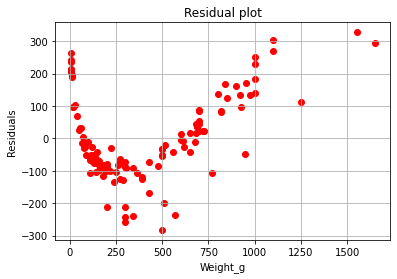

In [ ]:
e_i_residuals_list = [] 
for i in range(n): 
  x_i = X_train[i,:] #access i-th row of X
  y_i = y_train[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(weight_height_data['Weight_g'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("Weight_g")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Let us compute $R^2$. 

In [ ]:
#We shall now compute R^2 for training height weight data
n_train = len(weight_height_data.index) #number of data points in the training data set
#first we shall compute y_bar 
y_bar_train = 0
for i in range(n_train): #access each row from the training data set 
  y_train_i = float(weight_height_data.iat[i,4]) #access element at weight_g column
  y_bar_train += y_train_i

y_bar_train /= n_train
print('y_bar_train',y_bar_train)

#Next we shall compute sigma_yy, which is the variance of y_train
sigma_yy_train = 0
for i in range(n_train): #access each row from the training data set 
  y_i = float(weight_height_data.iat[i,4]) #access element at weight_g column
  sigma_yy_train += (y_i-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

#now we can compute sum of squared residuals 
sum_sq_residuals_train = 0
for i in range(n_train): #access each row from the training data set 
  x_i = X_train[i,:] #access i-th row of X_train
  y_i = y_train[i] #access i-th row of y_train

  y_pred_i = np.dot(x_i,beta_train) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals_train += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals_train)
print('Root Mean Squared Error (RMSE):', np.sqrt(sum_sq_residuals_train/n_train))

#Then we will compute the R^2 quantity
R_sq_train = 1-sum_sq_residuals_train/sigma_yy_train
print('R^2 score:',R_sq_train)

y_bar_train 404.4782258064517
sigma_yy_train: 15451937.951209672
sum of squared residuals: [2104316.3107336]
Root Mean Squared Error (RMSE): [130.27007649]
R^2 score: [0.86381538]


$\Large{\text{Finding $\beta$ using sklearn library}}$

In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
#print the coefficients and the intercept
print('intercept: ', LR.intercept_)
print('coefficients:')
print(LR.coef_)

print('Recall the coefficients and intercept from our formula:')
print(beta)

intercept:  [-740.77633006]
coefficients:
[[ 2.4173551  27.8581628   2.67475542 13.06363395  0.        ]]
Recall the coefficients and intercept from our formula:
[[   2.4173551 ]
 [  27.8581628 ]
 [   2.67475542]
 [  13.06363395]
 [-740.77633006]]


$\large{\text{Compute performance on train data}}$

In [ ]:
y_train_prediction = LR.predict(X_train)
y_train_prediction


array([[ 375.14921228],
       [ 418.0840699 ],
       [ 431.74602667],
       [ 470.27651653],
       [ 503.97548146],
       [ 532.55368904],
       [ 508.55556438],
       [ 554.19619173],
       [ 559.68912085],
       [ 550.04064032],
       [ 533.54751345],
       [ 587.07436121],
       [ 604.9215406 ],
       [ 612.66731931],
       [ 614.31986168],
       [ 619.04003539],
       [ 633.12956079],
       [ 641.78281328],
       [ 645.93935688],
       [ 691.8514891 ],
       [ 677.43245952],
       [ 701.37188305],
       [ 696.42958763],
       [ 723.78381367],
       [ 769.91170298],
       [ 786.39346693],
       [ 784.14260174],
       [ 828.99882038],
       [ 840.96118694],
       [ 335.03229339],
       [ 344.0834433 ],
       [ 396.88756007],
       [ 663.53818679],
       [ 747.80602536],
       [ -30.85741325],
       [  83.39206857],
       [ 139.40822714],
       [ 170.14460789],
       [ 173.45068483],
       [ 177.30739548],
       [ 215.99634495],
       [ 242.906

In [ ]:
# importing R2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# computing R2 score and sum of square residuals
score=r2_score(y_train,y_train_prediction)
print('From scikit learn:')
print('R2 score is:',score)
mse=mean_squared_error(y_train,y_train_prediction)
print('sum of squared residuals:',n_train*mse)
print('RMSE:',np.sqrt(mse))
print('*****************')

print('Recall the R2 score, sum of squared resuiduals and rmse from our formula: ')
print('R2:',R_sq_train)
print('sum of squared residuals:',sum_sq_residuals_train)
print('RMSE:',np.sqrt(sum_sq_residuals_train/n_train))

From scikit learn:
R2 score is: 0.8638153791855696
sum of squared residuals: 2104316.310733597
RMSE: 130.2700764891798
*****************
Recall the R2 score, sum of squared resuiduals and rmse from our formula: 
R2: [0.86381538]
sum of squared residuals: [2104316.3107336]
RMSE: [130.27007649]


$\Large{\text{Prediction on weigth height test data}}$

$\large{\text{First, let us prepare the test data as numpy arrays}}$

In [ ]:
weight_height_data_test = pd.read_excel('/content/Q1_test.xlsx', index_col=False, header=0)
weight_height_data_test


,Species,Length_cm,Height_pct,Width_pct,Weight_g
0,1,34.7,39.2,14.2,NaN
1,1,39.5,38.3,14.1,NaN
2,1,46.5,37.9,13.7,NaN
3,1,41.5,39.8,14.1,NaN
4,1,35.1,39.9,13.8,NaN
5,2,34.0,31.6,19.3,NaN
6,3,24.3,27.3,14.6,NaN
7,3,29.2,30.4,15.4,NaN
8,3,27.2,27.7,14.1,NaN
9,3,21.2,26.3,13.7,NaN


In [ ]:
#extract the predictor variable columns 
cols = [0,1,2,3]
# print (airline_costs_data.columns[cols])
X_test_data = weight_height_data_test[weight_height_data_test.columns[cols]]

X_test_data

,Species,Length_cm,Height_pct,Width_pct
0,1,34.7,39.2,14.2
1,1,39.5,38.3,14.1
2,1,46.5,37.9,13.7
3,1,41.5,39.8,14.1
4,1,35.1,39.9,13.8
5,2,34.0,31.6,19.3
6,3,24.3,27.3,14.6
7,3,29.2,30.4,15.4
8,3,27.2,27.7,14.1
9,3,21.2,26.3,13.7


In [ ]:
#convert predictor variable columns into a numpy array

X_test_array = weight_height_data_test[weight_height_data_test.columns[cols]].to_numpy()
X_test_array

array([[ 1. , 34.7, 39.2, 14.2],
       [ 1. , 39.5, 38.3, 14.1],
       [ 1. , 46.5, 37.9, 13.7],
       [ 1. , 41.5, 39.8, 14.1],
       [ 1. , 35.1, 39.9, 13.8],
       [ 2. , 34. , 31.6, 19.3],
       [ 3. , 24.3, 27.3, 14.6],
       [ 3. , 29.2, 30.4, 15.4],
       [ 3. , 27.2, 27.7, 14.1],
       [ 3. , 21.2, 26.3, 13.7],
       [ 4. , 23.2, 40.5, 14.7],
       [ 4. , 19.8, 37.4, 13.5],
       [ 5. , 12.6, 15.7, 10.2],
       [ 5. , 13.1, 16.9,  9.8],
       [ 5. , 13.1, 16.9,  8.9],
       [ 6. , 64. , 15. ,  9.6],
       [ 6. , 45.5, 16. ,  9.5],
       [ 6. , 45.8, 17. , 11.2],
       [ 7. , 42.4, 29.2, 17.6],
       [ 7. , 31.6, 24.1, 15.1],
       [ 7. , 19.4, 26.8, 16.1],
       [ 7. , 22.5, 25.3, 16.3],
       [ 7. , 22.8, 28. , 15.5],
       [ 7. , 25. , 25.1, 14.9],
       [ 7. , 24.2, 24.6, 15. ],
       [ 7. , 24.5, 21.3, 14.8],
       [ 7. , 29.4, 26.6, 14.3],
       [ 7. , 46. , 27.4, 17.7],
       [ 7. , 30.1, 25.2, 15.4],
       [ 7. , 23.5, 26. , 14.5],
       [ 7

In [ ]:
#add a column of ones to X_train_array
X_test = np.hstack((X_test_array, np.ones((X_test_array.shape[0], 1), dtype=X_test_array.dtype)))

X_test

array([[ 1. , 34.7, 39.2, 14.2,  1. ],
       [ 1. , 39.5, 38.3, 14.1,  1. ],
       [ 1. , 46.5, 37.9, 13.7,  1. ],
       [ 1. , 41.5, 39.8, 14.1,  1. ],
       [ 1. , 35.1, 39.9, 13.8,  1. ],
       [ 2. , 34. , 31.6, 19.3,  1. ],
       [ 3. , 24.3, 27.3, 14.6,  1. ],
       [ 3. , 29.2, 30.4, 15.4,  1. ],
       [ 3. , 27.2, 27.7, 14.1,  1. ],
       [ 3. , 21.2, 26.3, 13.7,  1. ],
       [ 4. , 23.2, 40.5, 14.7,  1. ],
       [ 4. , 19.8, 37.4, 13.5,  1. ],
       [ 5. , 12.6, 15.7, 10.2,  1. ],
       [ 5. , 13.1, 16.9,  9.8,  1. ],
       [ 5. , 13.1, 16.9,  8.9,  1. ],
       [ 6. , 64. , 15. ,  9.6,  1. ],
       [ 6. , 45.5, 16. ,  9.5,  1. ],
       [ 6. , 45.8, 17. , 11.2,  1. ],
       [ 7. , 42.4, 29.2, 17.6,  1. ],
       [ 7. , 31.6, 24.1, 15.1,  1. ],
       [ 7. , 19.4, 26.8, 16.1,  1. ],
       [ 7. , 22.5, 25.3, 16.3,  1. ],
       [ 7. , 22.8, 28. , 15.5,  1. ],
       [ 7. , 25. , 25.1, 14.9,  1. ],
       [ 7. , 24.2, 24.6, 15. ,  1. ],
       [ 7. , 24.5, 21.3,

$\large{\text{Compute predictions on test data:}}$

In [ ]:
## Predict based on scikit learn

y_test_prediction =  LR.predict(X_test)

y_test_prediction

array([[ 518.67328896],
       [ 648.67882715],
       [ 837.39061103],
       [ 708.40728589],
       [ 526.46342929],
       [ 547.88632204],
       [ 207.17897006],
       [ 362.42661677],
       [ 282.50572739],
       [ 106.38663939],
       [ 215.56548102],
       [  96.87962494],
       [-202.43397682],
       [-190.5206425 ],
       [-202.27791305],
       [1222.18243728],
       [ 708.17481742],
       [ 741.4151994 ],
       [ 765.35407437],
       [ 418.18557856],
       [  98.60146593],
       [ 183.56236428],
       [ 188.6907456 ],
       [ 234.38373268],
       [ 212.06618812],
       [ 208.98421728],
       [ 353.13360178],
       [ 862.13526411],
       [ 383.2596555 ],
       [ 189.77831477],
       [ 749.44259551],
       [ 756.02210161],
       [ -15.63034889]])

In [ ]:
n_test = len(weight_height_data_test.index)
n_test

33

In [ ]:
## we first compute size of test data
n_test = len(weight_height_data_test.index) #number of data points in the test data
# print('number of data points in the test data:',n_test)

e_i_residuals_list_test = [] ## stores residuals on test data
for i in range(n_test): 
  x_i = X_test[i,:] #access i-th row of X_test

  y_pred_i = np.dot(x_i,beta_train) # compute the prediction obtained using the regression coefficients 
  #e_i_test = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i
  
  print(y_pred_i)




[518.67328896]
[648.67882715]
[837.39061103]
[708.40728589]
[526.46342929]
[547.88632204]
[207.17897006]
[362.42661677]
[282.50572739]
[106.38663939]
[215.56548102]
[96.87962494]
[-202.43397682]
[-190.5206425]
[-202.27791305]
[1222.18243728]
[708.17481742]
[741.4151994]
[765.35407437]
[418.18557856]
[98.60146593]
[183.56236428]
[188.6907456]
[234.38373268]
[212.06618812]
[208.98421728]
[353.13360178]
[862.13526411]
[383.2596555]
[189.77831477]
[749.44259551]
[756.02210161]
[-15.63034889]


In [ ]:
weight_height_data_test.insert(5,'weight_predict',y_pred_i)
weight_height_data_test.head()

ValueError: ignored

In [ ]:
#We shall now compute R^2 for training weight height data

#first we shall compute y_bar 
y_bar_test = 0
for i in range(n_test): #access each row from the test data set 
  #y_test_i = float(weight_height_data_test.iat[i,4]) #access element at weight_g column
  y_test_i = y_pred_i
  y_bar_test += y_test_i

y_bar_test /= n_test
print('y_bar_test',y_bar_test)

#Next we shall compute sigma_yy, which is the variance of y_test
sigma_yy_test = 0
for i in range(n_test): #access each row from the training data set 
  #y_i = float(weight_height_data_test.iat[i,4]) #access element at weight_g column
  y_i = y_pred_i
  sigma_yy_test += (y_i-y_bar_test)**2

print('sigma_yy_test:', sigma_yy_test)

#now we can compute sum of squared residuals 
sum_sq_residuals_test = 0
for i in range(n_test): #access each row from the training data set 
  x_i = X_test[i,:] #access i-th row of X_test
  y_i = y_pred_i #access i-th row of y_test

  y_pred_i = np.dot(x_i,beta_train) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals_test += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals_test)
rmse = np.sqrt(sum_sq_residuals_test/n_test)
print('Root Mean Squarred Error (RMSE):', rmse)

#Then we will compute the R^2 quantity
R_sq_test = 1 - sum_sq_residuals_test/sigma_yy_test
print('R^2 score:',R_sq_test)

y_bar_test [518.67328896]
sigma_yy_test: [1.70606001e-24]
sum of squared residuals: [4378979.21766252]
Root Mean Squarred Error (RMSE): [364.27508826]
R^2 score: [-2.5667205e+30]
